# Pymaceuticals Inc.
---

### Analysis

Most of the mice that were treated were treated by using Capomulin. The second most mice were treated with Ramicane. The amount of mice were close in number for these two treatments. The least amount of mice were treated with Propriva. The gender of the mice were almost even. For mouse l509, the tumor volume increased for the first few days, then decreased for the most, but started to increase again after the 40 days. The average tumor volume seemed to be higher if the weight was higher for the most part in the scatter plot.


In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
# Checking the number of mice.

mice_total=len(merged_data_df["Mouse ID"].unique())
mice_total

249

In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate=merged_data_df.loc[merged_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [80]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df = merged_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [82]:
# Checking the number of mice in the clean DataFrame.
mice_total2=len(clean_data_df["Mouse ID"].unique())
mice_total2

249

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_dataframe = pd.DataFrame({"Mean Tumor Volume": tumor_mean,	
                              "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_variance,
                              "Tumor Volume Std. Dev.": tumor_std,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary = clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

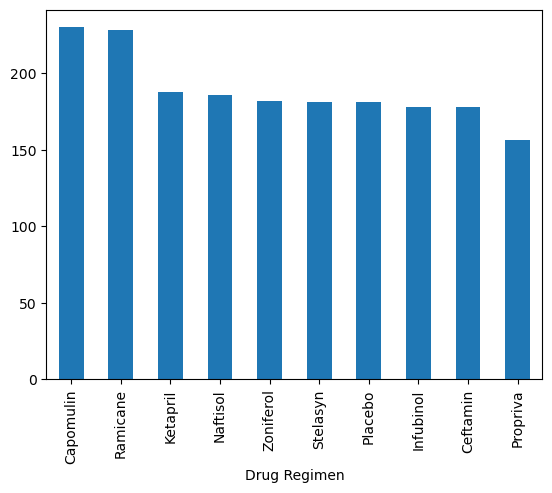

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_grouped = clean_data_df.groupby('Drug Regimen').count()['Mouse ID']

data_df = pd.DataFrame(data_grouped)

order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
data_df = pd.DataFrame(data_grouped).reindex(order)

data_df.plot(kind='bar', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel='# of Observed Mouse Timepoints'
plt.show()


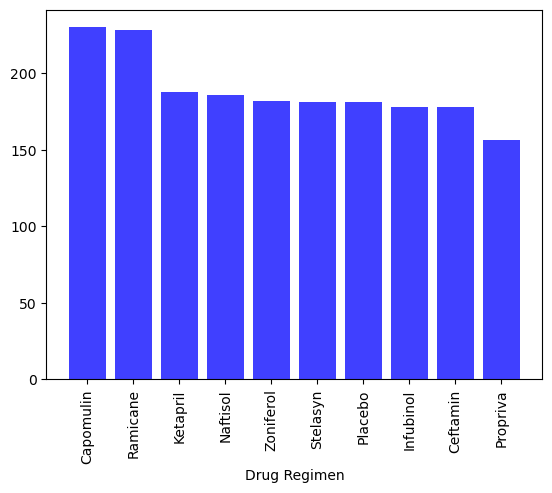

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

data_df2 = clean_data_df["Drug Regimen"].value_counts()
plt.bar(data_df2.index, data_df2.values, color="b", align="center", alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.show()


Text(0, 0.5, 'Sex')

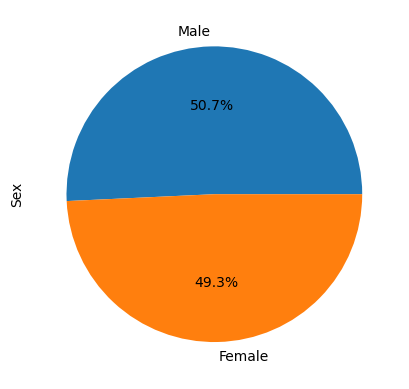

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data_pie_df= clean_data_df["Sex"].value_counts()

# Plot a pie chart using Pandas
data_pie_df2 = data_pie_df.plot(kind='pie', autopct='%1.1f%%')
data_pie_df2.set_ylabel("Sex")

([<matplotlib.patches.Wedge at 0x1f653cca510>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

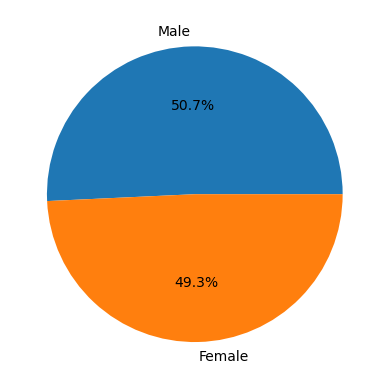

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(data_pie_df, labels=("Male", "Female"), autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()
                      
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_dfx = pd.merge(clean_data_df, greatest_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

merged_data_dfx.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
     
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data_dfx.loc[merged_data_dfx['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    subset = tumor_volume
    
    # Determine outliers using upper and lower bounds
    quartile1 = subset.quantile(0.25)
    quartile3 = subset.quantile(0.75)
    iqr = quartile3 - quartile1
    upperbound = quartile3 + 1.5 * iqr
    lowerbound = quartile1 - 1.5 * iqr
    outliers = subset[(subset < lowerbound) | (subset > upperbound)]

    tumor_volume_list.append(tumor_volume)

    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


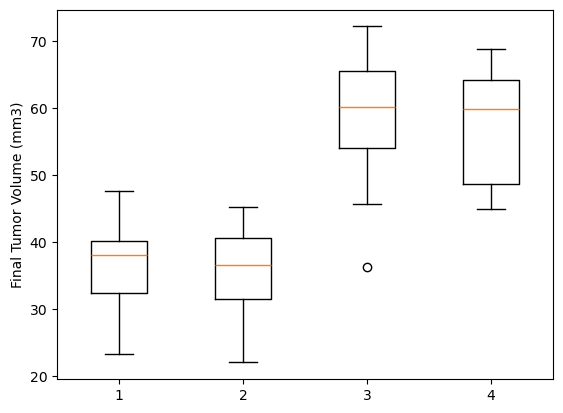

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_list)
plt.show()

## Line and Scatter Plots

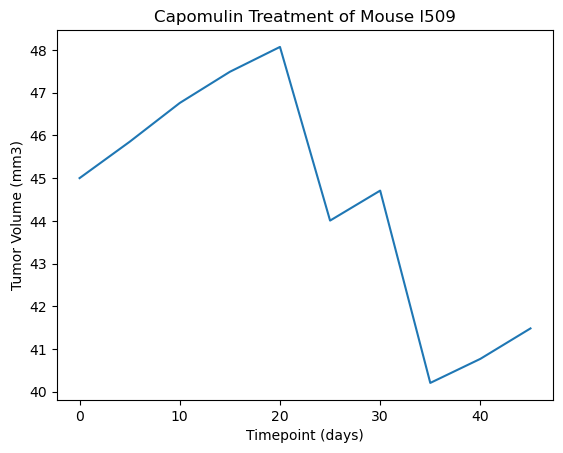

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
mouse = capomulin[capomulin['Mouse ID'] == 'l509'] 

fig1, ax1 = plt.subplots()
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

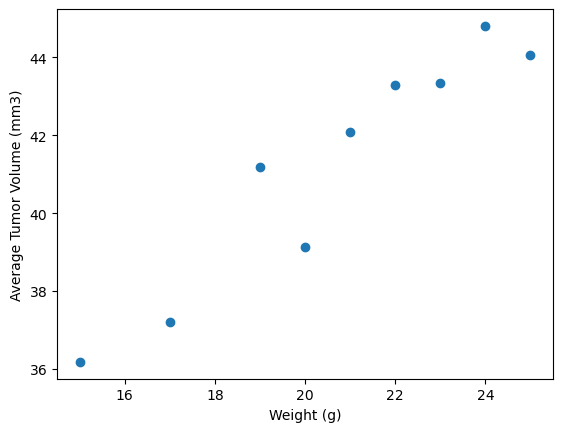

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

capomulin2 = capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

x_axis = capomulin2.index
y_axis = capomulin2.values

fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

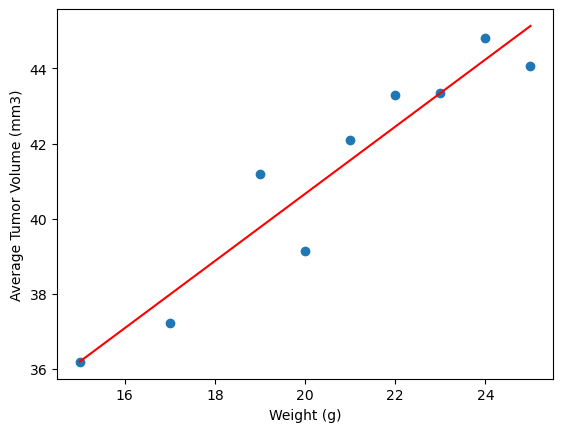

The correlation coefficient between weight and average tumor volume is 0.95


In [94]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

correlation = print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")